In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df=pd.read_csv('GOOGL.csv')

In [4]:
df.shape

(4431, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/19/2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [6]:
df=df.drop(['Date'],axis=1)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [8]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=0)

In [10]:
x_train.shape,x_test.shape

((4342, 5), (89, 5))

In [11]:
#applying Regression without any Transformation

lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

r2_score(y_test,y_pred)

0.9999053764722536

In [12]:
# cross checking with cross val score

lr=LinearRegression()

np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.9993176068728526

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\966659681.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


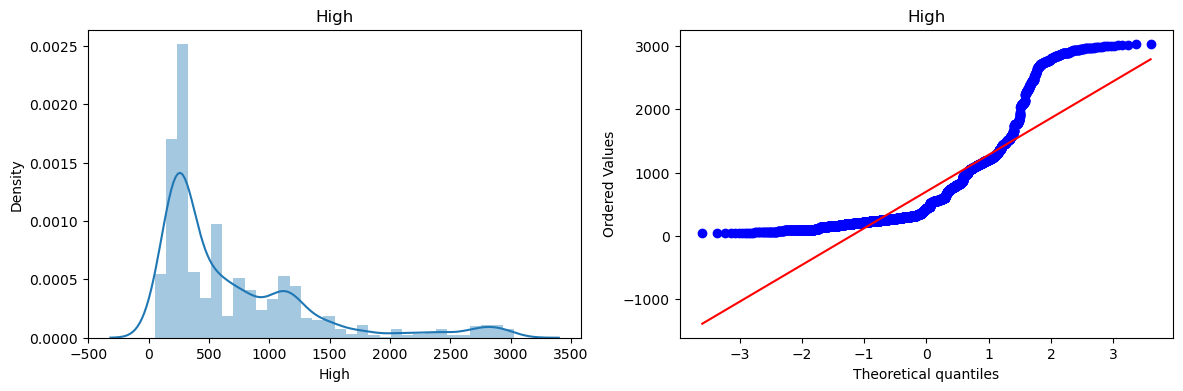

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\966659681.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


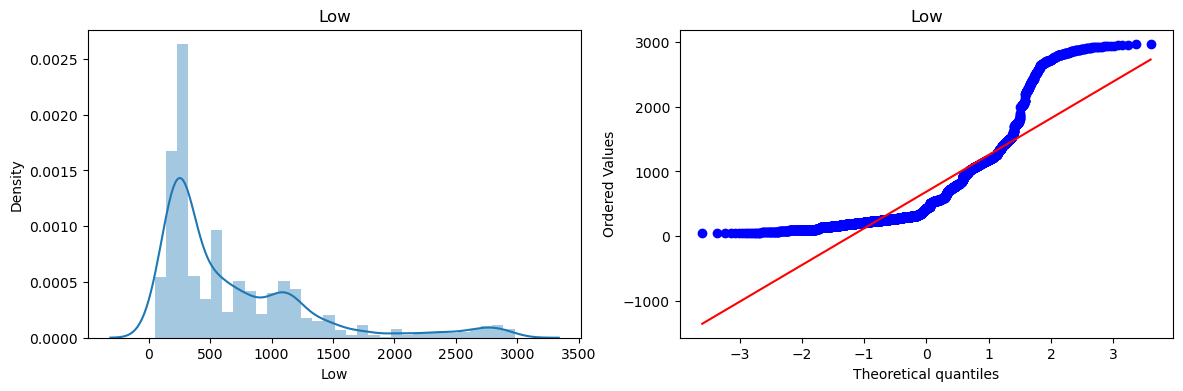

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\966659681.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


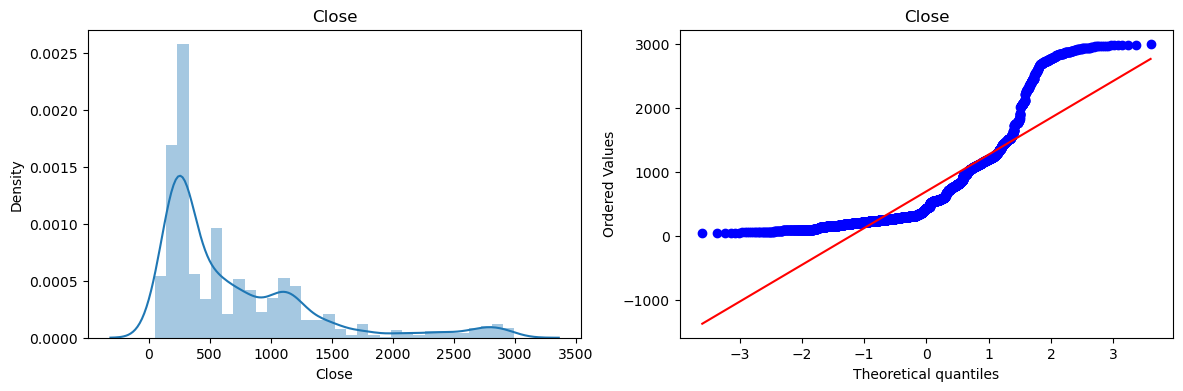

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\966659681.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


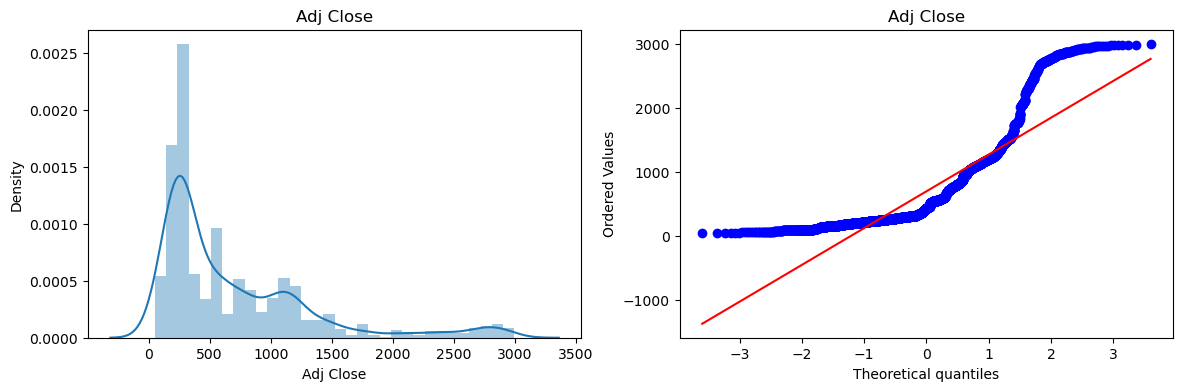

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\966659681.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


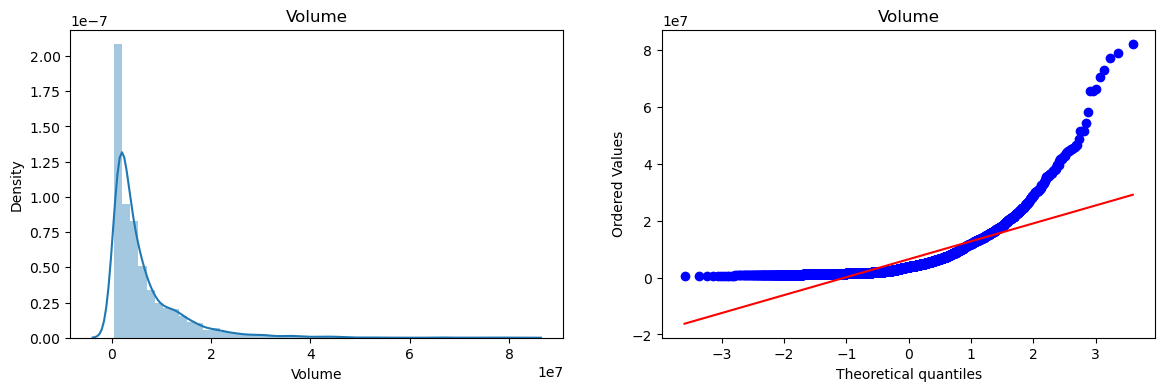

In [13]:
#plotting the distolots without any transformation

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.show()

In [14]:
#Applying  Boc-Cox Transform

pt=PowerTransformer(method='box-cox')

x_train_transformed=pt.fit_transform(x_train+0.000001)
x_test_transformed=pt.fit_transform(x_test+0.00001)

pd.DataFrame({'col':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,col,box_cox_lambdas
0,High,0.015390
1,Low,0.025909
2,Close,0.020282
3,Adj Close,0.020282
4,Volume,-0.337265


In [15]:
# Appling linear regression on transformed data

lr=LinearRegression()

lr.fit(x_train_transformed,y_train)

y_pred2=lr.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.8214222517550005

In [16]:
# using cross val score

pt=PowerTransformer(method='box-cox')
x_transformed=pt.fit_transform(x+0.00001)

lr=LinearRegression()

np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

-13.095007542457562

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


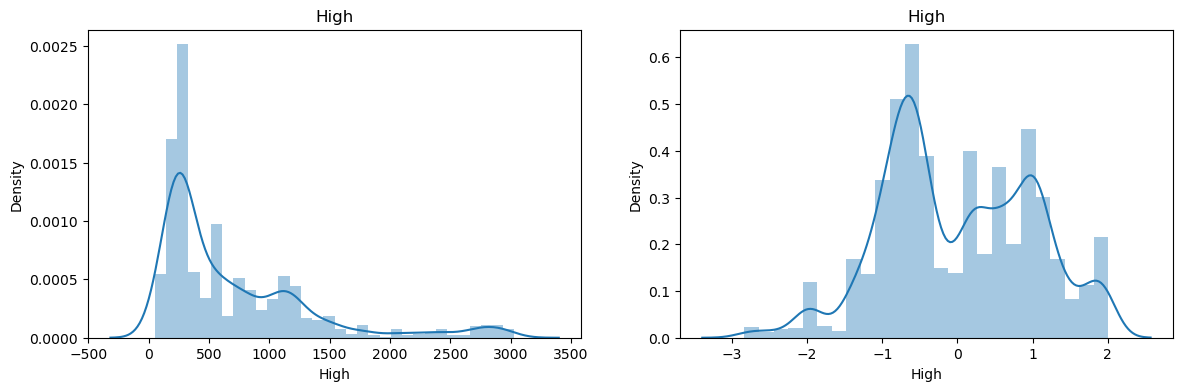

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


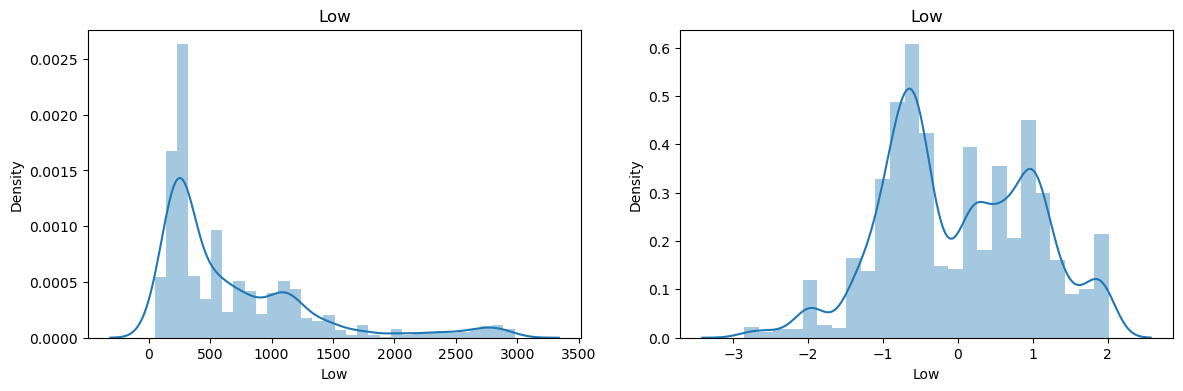

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


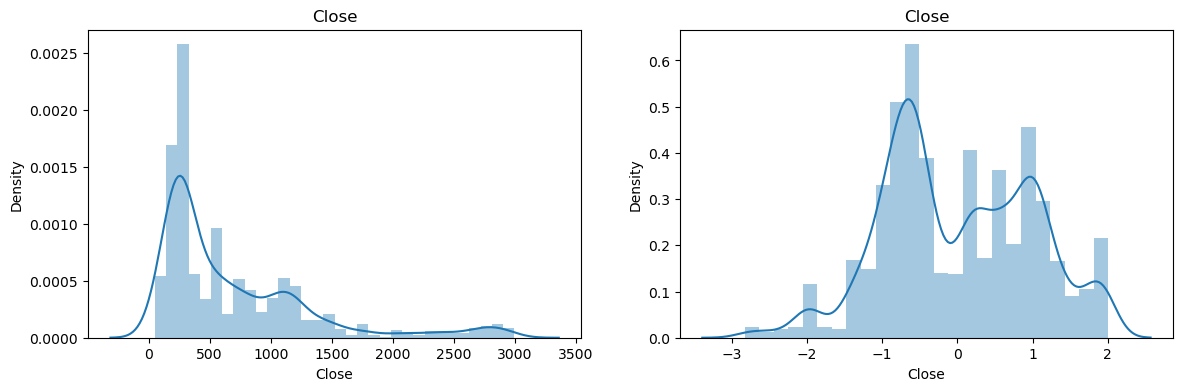

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


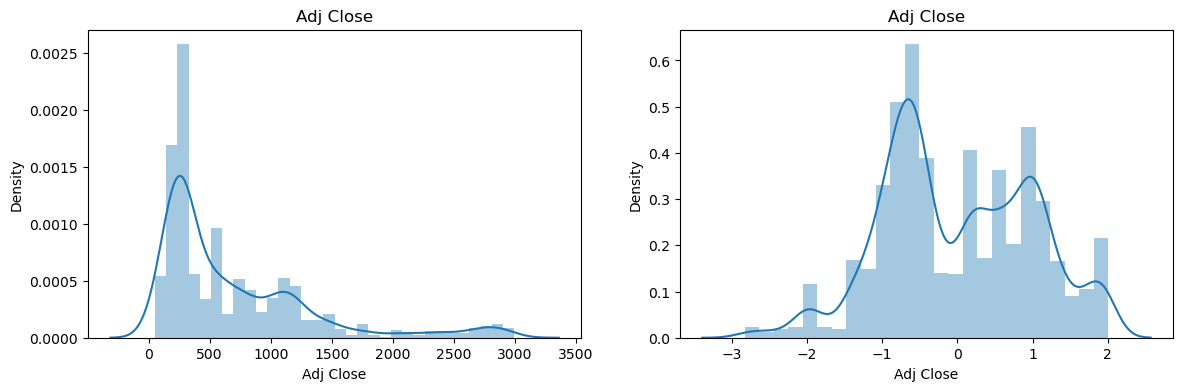

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\523667776.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


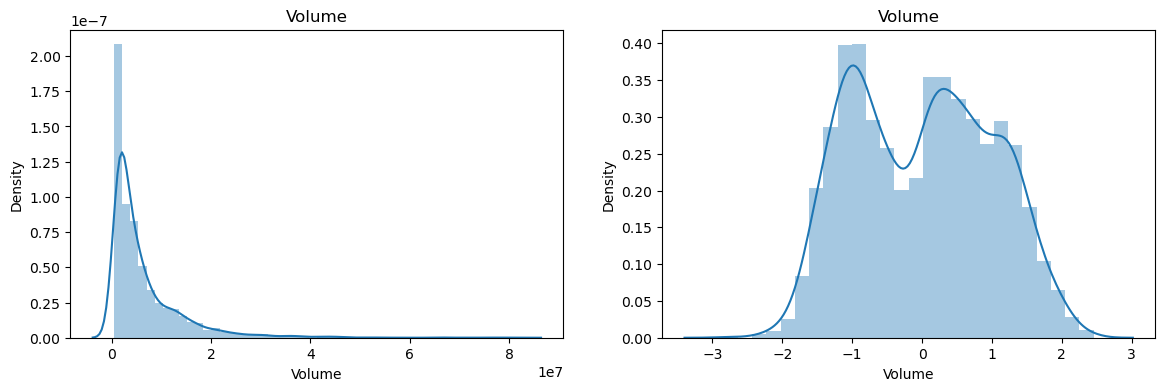

In [17]:
#before and after comparision for box-cox plot

x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col)
    
    plt.show()

In [18]:
#Applying  yeo-johnson transform

pt1=PowerTransformer()

x_train_transformed2=pt1.fit_transform(x_train)
x_test_transformed2=pt.fit_transform(x_test)


lr=LinearRegression()

lr.fit(x_train_transformed2,y_train)
y_pred3=lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'col':x_train.columns,'yeo_johson_lambdas':pt1.lambdas_})

0.8213950644956676


,col,yeo_johson_lambdas
0,High,-0.088697
1,Low,-0.081672
2,Close,-0.085331
3,Adj Close,-0.085331
4,Volume,-0.226488


In [19]:
#appyling cross val score

pt=PowerTransformer()

x_transformed2=pt.fit_transform(x)

lr=LinearRegression()

np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))

-13.082728933106612

In [20]:
x_train_transformed2=pd.DataFrame(x_train_transformed2,columns=x_train.columns)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


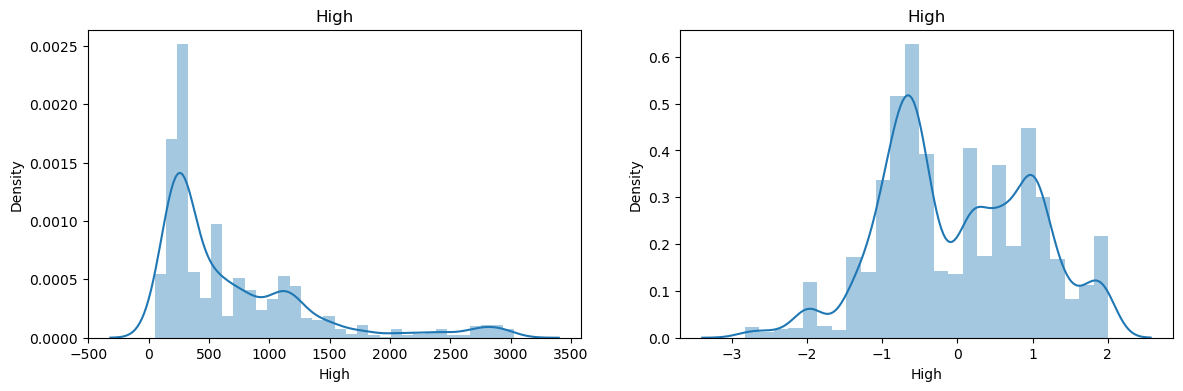

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


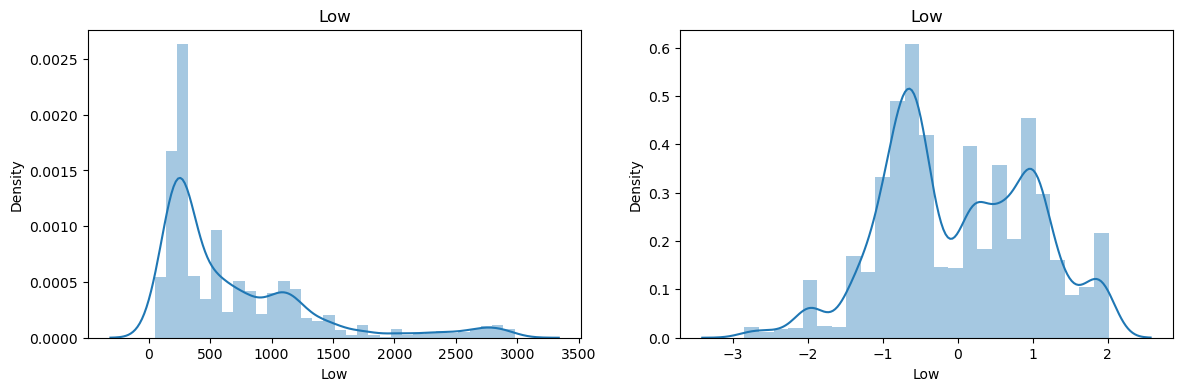

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


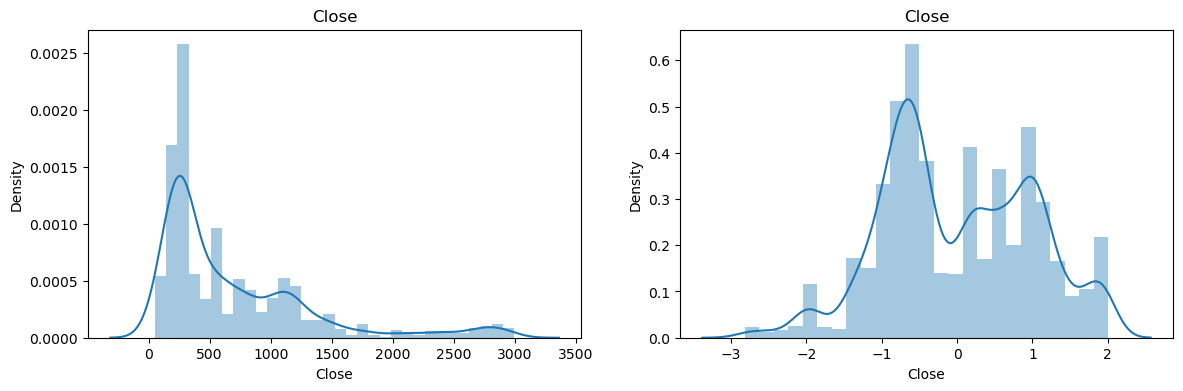

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


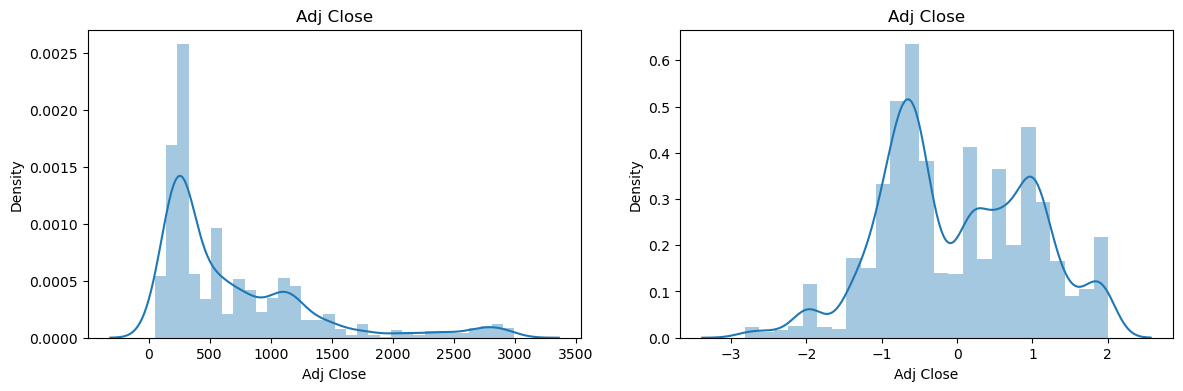

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3928\2665986760.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


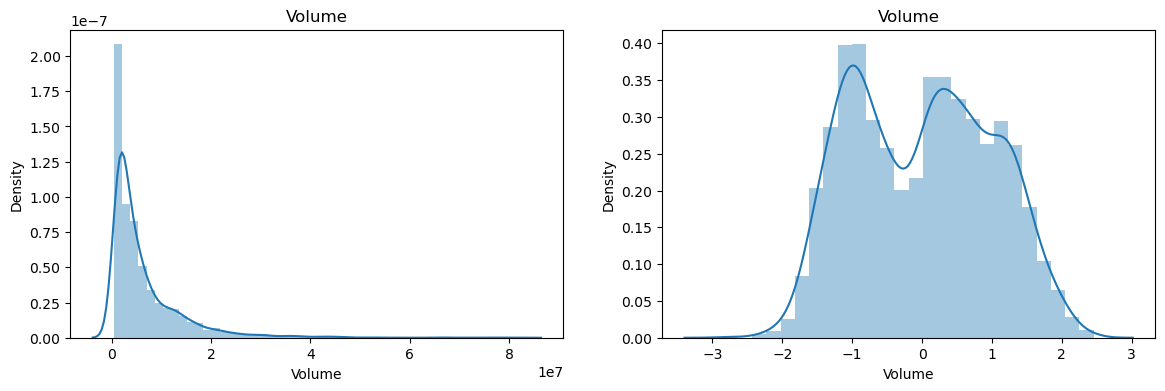

In [21]:
# before and after comparision for yeo_johnson

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x_train_transformed2[col])
    plt.title(col)
    
    plt.show()